In [ ]:
# tweets=api.user_timeline(screen_name='RealDonaldTrump', count=20)
#print(tweets)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import re

In [2]:
ACCESS_TOKEN="1114257900657106945-1dCAiAhqC8Dn7N0SYchfrcPBJNnO3R"
ACCESS_TOKEN_SECRET="9q6svuksiWxwxYggI5hVWgY8ZLrXESSMUAnGYNkEp97By"
CONSUMER_SECRET="g4CkmDKmbv2jNxm2yQOmth8NWOthgCgDSZGP1vBRuP5v4g6ZhD"
CONSUMER_KEY="eOqXos4xUTFpuv0uxPYCvRIpH"

In [3]:
def twitter_setup():
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET) # Authorization to consumer key and consumer secret
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET) # Access to user's access key and access secret 
    api = tweepy.API(auth)  # Return API with authentication:
    return api

In [4]:
hashtag=input('Enter hashtag to search about:')

Enter hashtag to search about:#DontCallMeAngel


Number of tweets extracted: 100.



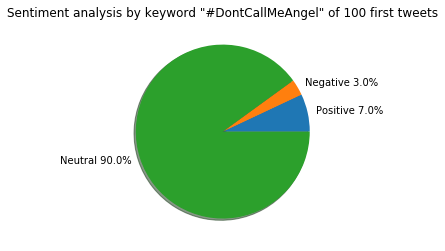

,Tweet,len,user_name,date,source,location,number of followers,retweets,Sentiment
0,call angel until,140,bocadiIIac,2019-09-14 11:23:45,Twitter for iPhone,,61,742,0.0
1,Choose your warrior,118,odetovalerie,2019-09-14 11:23:44,Twitter for iPhone,,2313,2631,0.0
2,debuts Tube with Million views,140,riccardohopeful,2019-09-14 11:23:44,Twitter for iPhone,,371,41,0.0
3,Camila responsible cleaning mansion Ariana rec...,140,aeraleey_,2019-09-14 11:23:42,Twitter for iPhone,,1036,5568,0.0
4,have watched video,114,iaremunera,2019-09-14 11:23:40,Twitter for iPhone,,2,5446,0.0


In [5]:
# Extracting tweets by a key word
extractor = twitter_setup()
tweets = extractor.search(q=hashtag, count=500, lang='en')

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# Creating a DataFrame with extracted tweets
tweet_text=[]
for tweet in tweets[:]:
    text=TextBlob(tweet.text)
    tweet_text.append(tweet.text)
data_on_new_hashtag={'Tweet': tweet_text}
df=pd.DataFrame(data_on_new_hashtag)

# Tweets cleaning

clean_tweets=[]
for tweet in df.Tweet :
    tweet=re.sub(r'@[A-Za-z0-9]+','',tweet) # Remove @username
    tweet=re.sub('https?://[A-Za-z0-9./]+','', tweet) # Remove https links
    tweet = re.sub(r'\b\w{1,3}\b', '', tweet) # Remove small words
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')  # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = re.sub(r'\&\w*;', '', tweet) # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub('[!@$:]', '', tweet) # Remove some special characters
    tweet = tweet.lstrip(' ') # Removing the blank space at the beginning
    tweet = re.sub(r'#\w*', '', tweet) # Remove hashtags
    tweet=re.sub('[^A-Za-z0-9]+', ' ', tweet)
    clean_tweets.append(tweet)
    
# Sentiment analysis on cleaned tweets

neutral=0
positive=0
negative=0
polarity=[]
posit_text=[]
neg_text=[]
neutral_text=[]

for tweet in clean_tweets:
    text=TextBlob(tweet)
    polarity.append(text.sentiment.polarity)

# Assigning all values to three categories: positive, negative and neutral sentiment

    if text.sentiment.polarity < 0:
        negative +=1 
        neg_text.append(clean_tweets)
         # The + operation adds the array elements to the original array.
    elif text.sentiment.polarity > 0:
        positive += 1
        posit_text.append(clean_tweets)
    else: neutral += 1
        
# Calculating the percentage of positive, negative and neutral sentiment

neutral_percent=round(neutral/len(polarity)*100,2)
positive_percent=round(positive/len(polarity)*100,2)
negative_percent=round(negative/len(polarity)*100,2)

# Plotting a pie chart
labels='Positive '+str(positive_percent)+'%', 'Negative '+str(negative_percent)+'%', 'Neutral '+str(neutral_percent)+'%'
sizes=[positive_percent, negative_percent, neutral_percent]
plt.title('Sentiment analysis by keyword "'+str(hashtag)+'" of '+str(len(polarity))+' first tweets')
plt.pie(sizes, labels=labels, shadow=True)

plt.show()

# Creating DataFrame (updating the previous one) with cleaned tweets and addtional interesting information on them 

df['Tweet']=clean_tweets
df['len']=np.array([len(tweet.text) for tweet in tweets])
df['user_name']= np.array([tweet.user._json['screen_name'] for tweet in tweets])
df['date']=np.array([tweet.created_at for tweet in tweets])
df['source']=np.array([tweet.source for tweet in tweets])
#df['likes']=np.array([tweet.favorite_count for tweet in tweets])
df['location']=np.array([tweet.user._json['location'] for tweet in tweets])
#df['user_id']=np.array([tweet.id for tweet in tweets])
df['number of followers']=np.array([tweet.user._json['followers_count'] for tweet in tweets])
df['retweets']=np.array([tweet.retweet_count for tweet in tweets])
df['Sentiment']=polarity

df.head()

In [6]:
df['calculated_field']=df.Sentiment*df['number of followers']*df.retweets

In [8]:
df.nlargest(10, 'calculated_field').sort_values(by='Sentiment', ascending=False)

,Tweet,len,user_name,date,source,location,number of followers,retweets,Sentiment,calculated_field
75,love friendship,83,ts_bp_ag_tw_kp_,2019-09-14 11:19:14,Twitter for Android,《BLACKPINK IN Y♡UR AREA》《🇵🇭》,455,183,0.500000,41632.500000
31,proud this record these women hope enjoy your...,144,blessgodbieber,2019-09-14 11:22:26,Twitter for Android,,2348,134,0.483333,152072.133333
20,Smilers reached MILLON views YouTube there st...,139,riccardohopeful,2019-09-14 11:22:58,Twitter for iPhone,,371,46,0.250000,4266.500000
16,lana verse heavenly really what,119,AmeliaBridgetx,2019-09-14 11:23:11,Twitter for iPhone,,336,3226,0.200000,216787.200000
52,think ever seen this much girl power video ve...,140,NrSyida,2019-09-14 11:20:43,Twitter for iPhone,Mul 🖤,1403,471,0.067500,44604.877500
47,think ever seen this much girl power video ve...,140,AliceKwla,2019-09-14 11:21:13,Twitter for iPhone,"Meurthe-et-Moselle, Lorraine",250,471,0.067500,7948.125000
0,call angel until,140,bocadiIIac,2019-09-14 11:23:45,Twitter for iPhone,,61,742,0.000000,0.000000
1,Choose your warrior,118,odetovalerie,2019-09-14 11:23:44,Twitter for iPhone,,2313,2631,0.000000,0.000000
2,debuts Tube with Million views,140,riccardohopeful,2019-09-14 11:23:44,Twitter for iPhone,,371,41,0.000000,0.000000
3,Camila responsible cleaning mansion Ariana rec...,140,aeraleey_,2019-09-14 11:23:42,Twitter for iPhone,,1036,5568,0.000000,0.000000


In [10]:
df.nsmallest(10, 'calculated_field').sort_values(by='Sentiment', ascending=False)

,Tweet,len,user_name,date,source,location,number of followers,retweets,Sentiment,calculated_field
0,call angel until,140,bocadiIIac,2019-09-14 11:23:45,Twitter for iPhone,,61,742,0.0000,0.0000
1,Choose your warrior,118,odetovalerie,2019-09-14 11:23:44,Twitter for iPhone,,2313,2631,0.0000,0.0000
2,debuts Tube with Million views,140,riccardohopeful,2019-09-14 11:23:44,Twitter for iPhone,,371,41,0.0000,0.0000
3,Camila responsible cleaning mansion Ariana rec...,140,aeraleey_,2019-09-14 11:23:42,Twitter for iPhone,,1036,5568,0.0000,0.0000
4,have watched video,114,iaremunera,2019-09-14 11:23:40,Twitter for iPhone,,2,5446,0.0000,0.0000
5,Choose your warrior,118,phillie123,2019-09-14 11:23:35,Twitter for iPhone,California,424,2631,0.0000,0.0000
6,Camila responsible cleaning mansion Ariana rec...,140,flohellasad,2019-09-14 11:23:31,Twitter for iPhone,hell,274,5568,0.0000,0.0000
7,reached iTunes This Lana fourth song achieve ...,140,naiaradiamandis,2019-09-14 11:23:24,Twitter for Android,,322,591,0.0000,0.0000
8,want Miley Ariana collab like Dream Over Their...,140,MileyMCCyrus_,2019-09-14 11:23:21,Twitter for Android,Germany DE,338,2,0.0000,0.0000
24,THIS MEAN GIRLS EDIT,79,NLMA54,2019-09-14 11:22:44,Twitter for Android,"Bogotá, D.C., Colombia",55,387,-0.3125,-6651.5625


In [19]:
#Total sum of calculated_field values - shows if the trend is positive or negative
round(df.calculated_field.sum(),2)

460659.77

In [20]:
import nltk
import itertools
from collections import Counter

In [21]:
#Tokenization (splitting text into a list of words) 
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
 
tokenized_tweets=[]
for tweet in clean_tweets:
    tokenized_tweets.append(tweet_tokenizer.tokenize(tweet))
    
merged = list(itertools.chain.from_iterable(tokenized_tweets))
top_most_common_words=Counter(merged).most_common(10)
top_most_common_words
#df3=pd.DataFrame(top_most_common_words, columns= ['Total','freq' ])


[('ariana', 28),
 ('video', 21),
 ('twitter', 18),
 ('promoting', 18),
 ('record', 17),
 ('camila', 16),
 ('responsible', 16),
 ('cleaning', 16),
 ('mansion', 16),
 ('humble', 16)]

In [22]:
# potivite tweets and negative tweets
p=df.Tweet.where(df.Sentiment > 0)
p.dropna(inplace=True)
n=df.Tweet.where(df.Sentiment < 0)
n.dropna(inplace=True)

In [23]:
#tokenization of positive and negative tweets
tokenized_tweets_p=[]
for tweet in list(p):
    tokenized_tweets_p.append(tweet_tokenizer.tokenize(tweet))
top_10_positive_words=Counter(list(itertools.chain.from_iterable(tokenized_tweets_p))).most_common(15)

tokenized_tweets_n=[]
for tweet in list(n):
    tokenized_tweets_n.append(tweet_tokenizer.tokenize(tweet))
top_10_negative_words=Counter(list(itertools.chain.from_iterable(tokenized_tweets_n))).most_common(15)


In [24]:
df1=pd.DataFrame(top_10_positive_words, columns= ['Positive','freq_p' ])
df2=pd.DataFrame(top_10_negative_words, columns= ['Negative','freq_n' ])
df_merged = df1.merge(df2, how='outer', left_index=True, right_index=True)
df_merged

,Positive,freq_p,Negative,freq_n
0,time,3,call,2.0
1,this,3,angel,2.0
2,views,2,when,2.0
3,first,2,this,1.0
4,think,2,mean,1.0
5,ever,2,girls,1.0
6,seen,2,edit,1.0
7,much,2,mess,1.0
8,girl,2,undressed,1.0
9,power,2,know,1.0


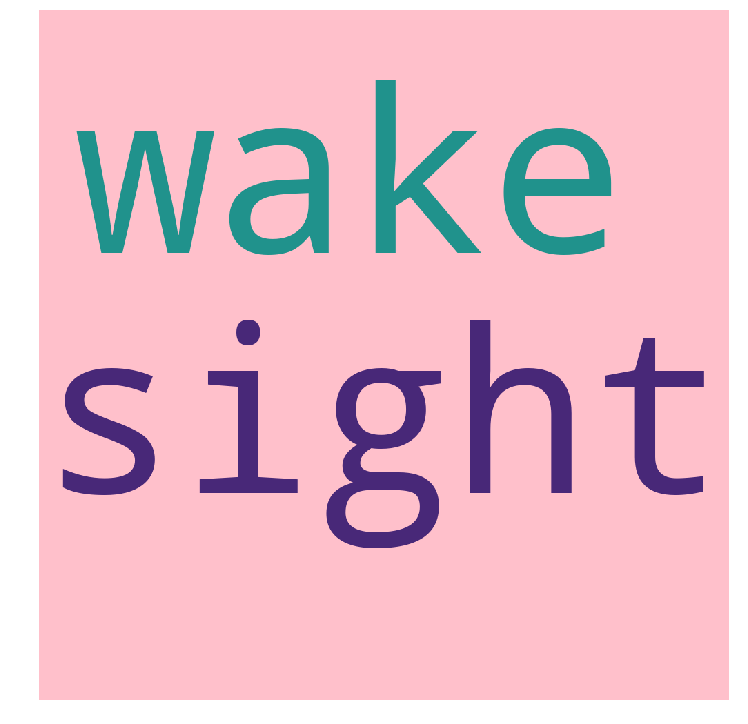

In [25]:
comment_words = ' ' #We will be appending the words to this var
stopwords = set(STOPWORDS) #Finds all stop words in the set of tweets.
for val in df.Tweet:
   val = str(val) #convert all tweet content into strings
   tokens = val.split() #Split all strings into individual components
   for i in range(len(tokens)):
      tokens[i] = tokens[i].lower() #Converts all the individual strings to lower case.
for words in tokens:
   comment_words = comment_words + words + ' '
wordcloud=WordCloud(width=1000,height=1000, background_color='pink', stopwords=stopwords,min_font_size=6).generate(comment_words)
#All of this is a single line
plt.style.use('ggplot')
plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [26]:
df.date.max()-df.date.min()

Timedelta('0 days 00:05:49')